In [53]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [3]:
# multiindex series
ser = pd.MultiIndex.from_tuples([('cse', 2019), ('ese', 2020),('cse', 2021),('ese', 2022),('cse', 2022),('ese', 2019),('ese', 2021),('cse', 2022),])
ser 

MultiIndex([('cse', 2019),
            ('ese', 2020),
            ('cse', 2021),
            ('ese', 2022),
            ('cse', 2022),
            ('ese', 2019),
            ('ese', 2021),
            ('cse', 2022)],
           )

In [4]:
ser = pd.MultiIndex.from_product([['cse', 'ese'], [2019, 2020, 2021, 2022]])
ser

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ese', 2019),
            ('ese', 2020),
            ('ese', 2021),
            ('ese', 2022)],
           )

In [5]:
# use the multiindex object to create a series
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8], index=ser)

In [6]:
# fetchin the series
s[('cse',2021)]

3

In [7]:
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [8]:
# unstack 
dfs = s.unstack()

In [9]:
# stack 
dfs.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ese  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [10]:
# multiindex dataframe

branch_df1 = pd.DataFrame([
    [1,2],
    [3,4],
    [5,6],
    [7,8],
    [9,10],
    [11,12],
    [13,14],
    [15,16]
],
index = ser , 
columns=['avg_package','students']
)

branch_df1


avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ese 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [11]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [12]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = ser,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ese 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [13]:
# stacking , unstacking
# branch_df1.unstack().unstack()
branch_df1.unstack().stack().stack()

C:\Users\tayya\AppData\Local\Temp\ipykernel_4008\3080344371.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df1.unstack().stack().stack()


cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ese  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

In [14]:
branch_df2.stack().stack()

C:\Users\tayya\AppData\Local\Temp\ipykernel_4008\2534568903.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack().stack()


2019  avg_package  delhi     1
                   mumbai    0
      students     delhi     2
                   mumbai    0
2020  avg_package  delhi     3
                   mumbai    0
      students     delhi     4
                   mumbai    0
2021  avg_package  delhi     5
                   mumbai    0
      students     delhi     6
                   mumbai    0
2022  avg_package  delhi     7
                   mumbai    0
      students     delhi     8
                   mumbai    0
dtype: int64

In [15]:
# branch_df3.unstack().unstack()
branch_df3.stack().stack() # long vs wide format

C:\Users\tayya\AppData\Local\Temp\ipykernel_4008\3891448949.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df3.stack().stack() # long vs wide format


cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ese  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
 

In [16]:
# working with multiindex df
# head adn tail 
branch_df3.head()
# shape
branch_df3.shape
# info 
branch_df3.info()
# describe
branch_df3.describe()
# duplicated 
branch_df3.duplicated()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ese', 2022)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


cse  2019    False
     2020    False
     2021    False
     2022    False
ese  2019    False
     2020    False
     2021    False
     2022    False
dtype: bool

In [17]:
# extracting the row single
branch_df3.loc[('cse',2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [18]:
branch_df3.loc[('cse',2022):('ese',2020) :2]

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
ese 2020          11       12           0        0

In [19]:
# Extracting columns
branch_df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ese  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [20]:
branch_df3.iloc[:, 1:3] # delhi avg package and students

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ese 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [21]:
# extracting both 
branch_df3.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ese,2019,10,0


In [22]:
# sort index 
branch_df3.sort_index( ascending=False)
branch_df3.sort_index( ascending=[False,True]) # sort by index and then by column
branch_df3.sort_index( level = 1 ,ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ese 2022          15       16           0        0
cse 2022           7        8           0        0
ese 2021          13       14           0        0
cse 2021           5        6           0        0
ese 2020          11       12           0        0
cse 2020           3        4           0        0
ese 2019           9       10           0        0
cse 2019           1        2           0        0

In [23]:
#transpose
branch_df3.T

cse                 ese               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [24]:
# swap level 
branch_df3.swaplevel()
branch_df3.swaplevel(axis =1) # swap level in columns

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ese 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0




Wide format is where we have a single row for every data point with multiple columns to hold the values of various attributes.

Long format is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.




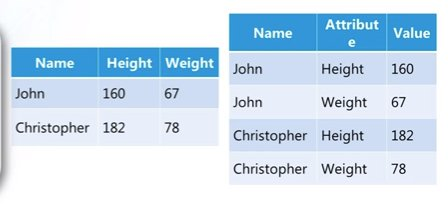

In [26]:
# melt (w - l)
pd.DataFrame({'cse':[120]}).melt()
# branch with year 
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt(var_name='branch', value_name='num_students')

,branch,num_students
0,cse,120
1,ece,100
2,mech,50


In [30]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
).melt(id_vars = ["branch"],var_name='year', value_name='num_students')

,branch,year,num_students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [32]:
# melt --> real world example
death = pd.read_csv(r'dataset\time_series_covid19_deaths_global.csv')
confirm = pd.read_csv(r'dataset\time_series_covid19_confirmed_global.csv')

In [44]:
d = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_deaths').head(20)
d

,Province/State,Country/Region,Lat,Long,date,num_deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
5,NaN,Antarctica,-71.949900,23.347000,1/22/20,0
6,NaN,Antigua and Barbuda,17.060800,-61.796400,1/22/20,0
7,NaN,Argentina,-38.416100,-63.616700,1/22/20,0
8,NaN,Armenia,40.069100,45.038200,1/22/20,0
9,Australian Capital Territory,Australia,-35.473500,149.012400,1/22/20,0


In [45]:
d.shape

(20, 6)

In [46]:
c = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='confirm_case').head(20)
c

,Province/State,Country/Region,Lat,Long,date,confirm_case
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
5,NaN,Antarctica,-71.949900,23.347000,1/22/20,0
6,NaN,Antigua and Barbuda,17.060800,-61.796400,1/22/20,0
7,NaN,Argentina,-38.416100,-63.616700,1/22/20,0
8,NaN,Armenia,40.069100,45.038200,1/22/20,0
9,Australian Capital Territory,Australia,-35.473500,149.012400,1/22/20,0


In [50]:
death = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_deaths')
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_cases')

In [52]:
confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','date'])[['Country/Region','date','num_cases','num_deaths']]

,Country/Region,date,num_cases,num_deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


In [55]:
# pivot table
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [56]:
df.groupby('sex')['total_bill'].mean()

C:\Users\tayya\AppData\Local\Temp\ipykernel_4008\3379495421.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['total_bill'].mean()


sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [58]:
df.groupby(['sex','smoker'])['total_bill'].mean().unstack()

C:\Users\tayya\AppData\Local\Temp\ipykernel_4008\2279680371.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])['total_bill'].mean().unstack()


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [59]:
# using pivot table
df.pivot_table(index ='sex',columns='smoker',values='total_bill')

C:\Users\tayya\AppData\Local\Temp\ipykernel_4008\1267129479.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index ='sex',columns='smoker',values='total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [60]:
# aggregate function
df.pivot_table(index ='sex',columns='smoker',values='total_bill',aggfunc='sum')

C:\Users\tayya\AppData\Local\Temp\ipykernel_4008\2449591056.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index ='sex',columns='smoker',values='total_bill',aggfunc='sum')


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [65]:
# col together all 
# df.pivot_table(index ='sex',columns='smoker')


In [68]:
# multidimensional pivot table
df.pivot_table(index = ['sex','smoker'],columns =['day','time'])

C:\Users\tayya\AppData\Local\Temp\ipykernel_4008\2921630472.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index = ['sex','smoker'],columns =['day','time'])


size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [69]:
# margins
df.pivot_table(index ='sex',columns='smoker',values='total_bill',aggfunc='sum',margins = True)

C:\Users\tayya\AppData\Local\Temp\ipykernel_4008\2684393239.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index ='sex',columns='smoker',values='total_bill',aggfunc='sum',margins = True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [ ]:
# plotting graphs
df = pd.read_csv('dataset\expense_data.csv')

In [72]:
df.head(5)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [75]:
pd.to_datetime(df['Date'])

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]

In [79]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['month']=df['Date'].dt.month_name()

<Axes: xlabel='month'>

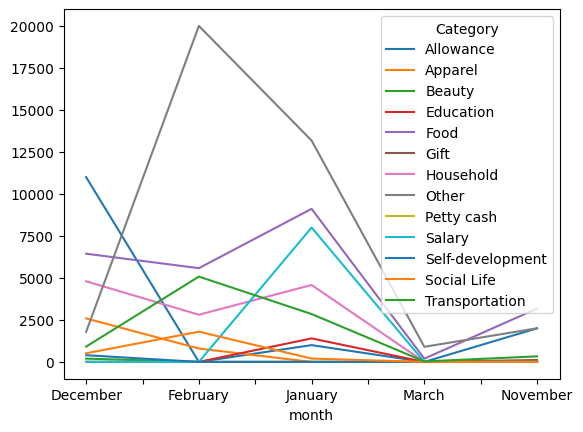

In [82]:
df.pivot_table(index = 'month',columns = 'Category',values = 'INR',aggfunc='sum',fill_value =0).plot()

<Axes: xlabel='month'>

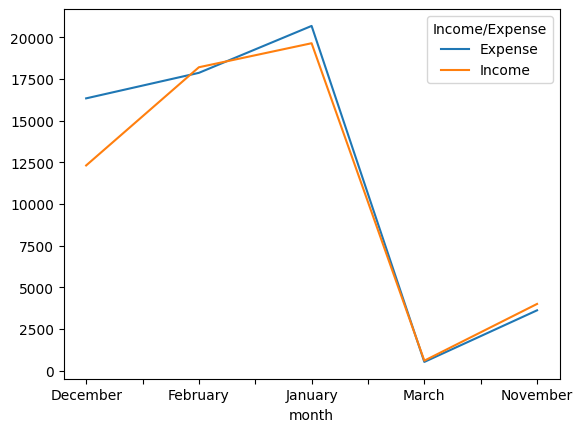

In [83]:
df.pivot_table(index = 'month',columns = 'Income/Expense',values = 'INR',aggfunc='sum',fill_value =0).plot()

<Axes: xlabel='month'>

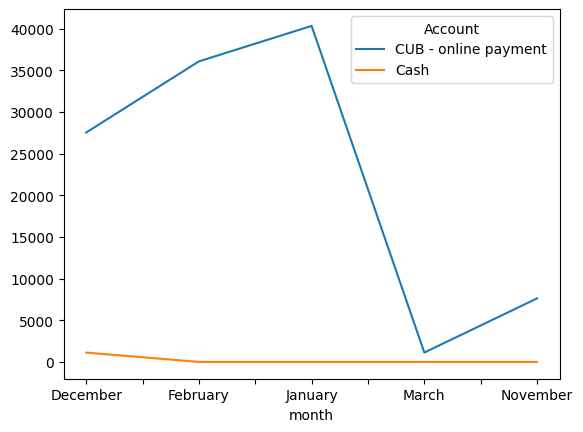

In [84]:
df.pivot_table(index = 'month',columns = 'Account',values = 'INR',aggfunc='sum',fill_value =0).plot()